In [ ]:
###############################################################
# Statistical Analysis for the Flat Scan Sampling single core
# João Inácio, Mar. 31st, 2021
# 

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [156]:
# System and simulation information


dim = "2D"
lattice = "SS"
NN = 4

L = 8
N_atm = 1 * L ** 2

max_E = (1 / 2) * NN * N_atm
max_M = N_atm
NE = int(1 + (max_E / 2))
NM = N_atm + 1
energies = np.linspace(- max_E, max_E, NE)
magnetizations = np.linspace(- max_M, max_M, NM)

REP = 10**3
skip = N_atm

q_max = (NM + 1) // 2 - 2
if NM % 2 == 0:
    q_max = NM // 2 - 3


In [157]:
# Get the data

n_run = 1000

JDOS_all = list()
wall_time_all = list()
q_time_E_all = list()

cfg_chkbrd = np.zeros(n_run)
cfg_slice = np.zeros(n_run)
cfg_zerozero = np.zeros(n_run)

for run in range(1, n_run + 1):
    file_name = "".join(("./data/", lattice, "/L", str(L), "/", 
                         str(int(np.log10(REP))), "/", str(run), "_JDOS_FSS_Ising_", 
                         dim, "_", lattice, "_L", str(L), "_REP_1E",
                         str(int(np.log10(REP))), "_skip_", str(skip)))
    JDOS = np.loadtxt(file_name + ".txt")
    JDOS[:, q_max+2:NM] = JDOS[:, range(q_max, -1, -1)]
    
    cfg_chkbrd[run - 1] = JDOS[len(energies) - 1, q_max+1]
    cfg_slice[run - 1] = JDOS[L, q_max+1]
    cfg_zerozero[run - 1] = JDOS[np.where(energies == 0)[0][0], q_max+1]

    JDOS_all.append(JDOS)
    
    with open(file_name + "_data.txt", 'r') as data_file:
        header = data_file.readline().strip("\n")
        
        q_time_E = np.zeros(q_max)
        for i in range(0, q_max):
            line = data_file.readline().strip("\n").split(" ")
            q_time_E[i] = float(line[4])

        wall_time_all.append(float(data_file.readline().strip("\n")))
        q_time_E_all.append(q_time_E)

JDOS_mean = sum(JDOS_all) / n_run
wall_time_mean = sum(wall_time_all) / n_run
q_time_E_mean = sum(q_time_E_all) / n_run

print("All done here...")


All done here...


mean: 1.99500336 ;sigma: 0.09158294207717067


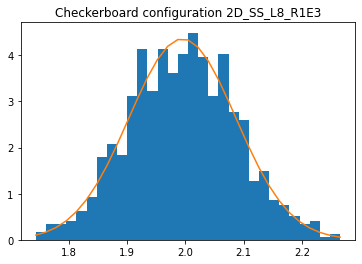

mean: 15.965307519999998 ;sigma: 3.1171599998247843


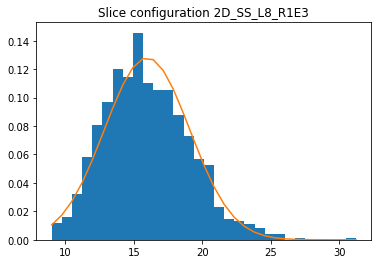

mean: 2.6130400900000003e+17 ;sigma: 1081066834621708.2


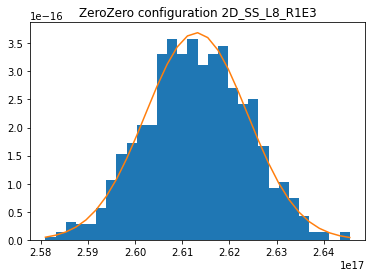

In [158]:
# Fit normal distributions to configurations

#Checkerboard
plt.figure(1)
_, bins, _ = plt.hist(cfg_chkbrd, 30, density=True, alpha=1)

fit_chkbrd = norm.fit(cfg_chkbrd)
best_fit_line = norm.pdf(bins, fit_chkbrd[0], fit_chkbrd[1])
print("mean:", fit_chkbrd[0], ";sigma:", fit_chkbrd[1])

plt.plot(bins, best_fit_line)
plt.title("Checkerboard configuration " + dim + "_" + 
          lattice + "_L" + str(L) + "_R1E" + str(int(np.log10(REP))))
plt.show()

# Slice
plt.figure(2)
_, bins, _ = plt.hist(cfg_slice, 30, density=True, alpha=1)

fit_slice = norm.fit(cfg_slice)
best_fit_line = norm.pdf(bins, fit_slice[0], fit_slice[1])
print("mean:", fit_slice[0], ";sigma:", fit_slice[1])

plt.plot(bins, best_fit_line)
plt.title("Slice configuration " + dim + "_" + 
          lattice + "_L" + str(L) + "_R1E" + str(int(np.log10(REP))))
plt.show()


# Zerozero
plt.figure(3)
_, bins, _ = plt.hist(cfg_zerozero, 30, density=True, alpha=1)

fit_zerozero = norm.fit(cfg_zerozero)
best_fit_line = norm.pdf(bins, fit_zerozero[0], fit_zerozero[1])
print("mean:", fit_zerozero[0], ";sigma:", fit_zerozero[1])

plt.plot(bins, best_fit_line)
plt.title("ZeroZero configuration " + dim + "_" + 
          lattice + "_L" + str(L) + "_R1E" + str(int(np.log10(REP))))
plt.show()


In [159]:
# If L = 4, compute error

if L == 4:
    JDOS_exact = np.loadtxt('JDOS_exact_L4_SS.txt')
    
    error_all = list()
    
    for run in range(0, n_run):
        JDOS_error = np.abs(JDOS_all[run] - JDOS_exact)
        JDOS_error = JDOS_error[np.where(JDOS_exact > 0)[0], np.where(JDOS_exact > 0)[1]] / JDOS_exact[np.where(JDOS_exact > 0)[0], np.where(JDOS_exact > 0)[1]]
        error_all.append(np.sum(np.sum(JDOS_error)))
    
    _, bins, _ = plt.hist(error_all, 30, density=True, alpha=1)

    fit_error = norm.fit(error_all)
    best_fit_line = norm.pdf(bins, fit_error[0], fit_error[1])
    print("mean:", fit_error[0], ";sigma:", fit_error[1])

    plt.plot(bins, best_fit_line)
    plt.title("Error distribution " + dim + "_" + 
              lattice + "_L" + str(L) + "_R1E" + str(int(np.log10(REP))))
    plt.show()
    